In [1]:
import sys
print(sys.executable)

/usr/bin/python3


In [4]:
# Initialiser Spark
spark = SparkSession.builder \
    .appName("EDA Immatriculations") \
    .getOrCreate()

### Import des bibliothèques

In [19]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, mean,when
from pyspark.sql.types import IntegerType, DoubleType, BooleanType
import matplotlib.pyplot as plt
import seaborn as sns

### Chargement des données brutes

In [6]:
# Charger les données brutes
immatriculations = spark.read.csv("data/raw/immatriculations.csv", header=True, inferSchema=True)

### Nettoyage des données

In [7]:

# Afficher les premières lignes
print("Aperçu des données brutes:")
immatriculations.show(5)

Aperçu des données brutes:
+---------------+-------+----------------+---------+-----------+--------+--------+-------+--------+-----+
|immatriculation| marque|             nom|puissance|   longueur|nbPlaces|nbPortes|couleur|occasion| prix|
+---------------+-------+----------------+---------+-----------+--------+--------+-------+--------+-----+
|     3467 SB 72|   Seat|      Toledo 1.6|      102|     longue|       5|       5|   bleu|   false|18880|
|      113 LY 42|Renault|Vel Satis 3.5 V6|      245|très longue|       5|       5|   noir|   false|49200|
|      925 WK 87| Jaguar|   X-Type 2.5 V6|      197|     longue|       5|       5|  blanc|   false|37100|
|     3279 RV 81|Renault|     Laguna 2.0T|      170|     longue|       5|       5|   gris|   false|27300|
|       82 RZ 54|   Fiat|       Croma 2.2|      147|     longue|       5|       5|   bleu|   false|24780|
+---------------+-------+----------------+---------+-----------+--------+--------+-------+--------+-----+
only showing top 5 

In [8]:
# Vérification des types de données
print("\nInformations sur les données:")
immatriculations.printSchema()


Informations sur les données:
root
 |-- immatriculation: string (nullable = true)
 |-- marque: string (nullable = true)
 |-- nom: string (nullable = true)
 |-- puissance: integer (nullable = true)
 |-- longueur: string (nullable = true)
 |-- nbPlaces: integer (nullable = true)
 |-- nbPortes: integer (nullable = true)
 |-- couleur: string (nullable = true)
 |-- occasion: boolean (nullable = true)
 |-- prix: integer (nullable = true)



In [11]:
# Vérification des valeurs manquantes
print("\nValeurs manquantes par colonne:")
immatriculations.select([count(when(col(c).isNull(), c)).alias(c) for c in immatriculations.columns]).show()


Valeurs manquantes par colonne:


+---------------+------+---+---------+--------+--------+--------+-------+--------+----+
|immatriculation|marque|nom|puissance|longueur|nbPlaces|nbPortes|couleur|occasion|prix|
+---------------+------+---+---------+--------+--------+--------+-------+--------+----+
|              0|     0|  0|        0|       0|       0|       0|      0|       0|   0|
+---------------+------+---+---------+--------+--------+--------+-------+--------+----+



In [12]:
# Compter les occurrences pour chaque colonne de type 'string'
for col_name in immatriculations.columns:
    if dict(immatriculations.dtypes)[col_name] == 'string':
        print(f"Valeurs uniques pour {col_name}:")
        immatriculations.groupBy(col_name).count().show()

Valeurs uniques pour immatriculation:


+---------------+-----+
|immatriculation|count|
+---------------+-----+
|     9714 TO 25|    1|
|     5967 WQ 94|    1|
|     3395 SS 66|    1|
|     5259 BF 13|    1|
|     9415 LT 85|    1|
|     5745 DV 76|    1|
|     4802 OQ 17|    1|
|     7390 NS 90|    1|
|     2608 GI 87|    1|
|     8776 HZ 18|    1|
|     9154 HJ 69|    1|
|     5325 NW 97|    1|
|     3767 WS 45|    1|
|     5832 SC 72|    1|
|     1896 FT 39|    1|
|     7573 KO 37|    1|
|     8684 AE 41|    1|
|     5175 AB 10|    1|
|     9689 KA 72|    1|
|     7007 GF 18|    1|
+---------------+-----+
only showing top 20 rows

Valeurs uniques pour marque:
+----------+-----+
|    marque|count|
+----------+-----+
|Volkswagen| 7867|
|   Peugeot| 4852|
|    Jaguar| 9418|
|    Lancia|  587|
|       Kia| 1154|
|      Mini|  811|
|     Volvo| 6369|
|      Saab| 4282|
|      Audi|14668|
|      Seat| 1094|
|  Mercedes| 7541|
|   Renault|12449|
|       BMW|14529|
|     Dacia|  696|
|     Skoda| 1634|
|  Daihatsu| 1097|
|    Nis

In [13]:
# Recherche des doublons
duplicates = immatriculations.count() - immatriculations.dropDuplicates().count()
print(f"\nNombre de doublons : {duplicates}")


Nombre de doublons : 0


In [14]:
# Suppression des doublons
immatriculations = immatriculations.dropDuplicates()

In [15]:
# Statistiques descriptives
immatriculations.describe().show()

25/01/18 20:37:10 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+---------------+------+---------------+------------------+-----------+--------+-------------------+-------+------------------+
|summary|immatriculation|marque|            nom|         puissance|   longueur|nbPlaces|           nbPortes|couleur|              prix|
+-------+---------------+------+---------------+------------------+-----------+--------+-------------------+-------+------------------+
|  count|          99989| 99989|          99989|             99989|      99989|   99989|              99989|  99989|             99989|
|   mean|           NULL|  NULL|           NULL| 198.5612717398914|       NULL|     5.0|  4.868645551010611|   NULL|35730.097250697574|
| stddev|           NULL|  NULL|           NULL|136.71503186804125|       NULL|     0.0|0.49543653635265955|   NULL| 25769.47828911676|
|    min|        0 AJ 71|  Audi|       1007 1.4|                55|     courte|       5|                  3|  blanc|              7500|
|    max|     9999 LP 21| Volvo|Ypsilon 1.4 16V|

In [16]:
# Visualisation des données (nécessite la conversion en Pandas)
immatriculations_pd = immatriculations.toPandas()

### Visualisation des données

/tmp/ipykernel_3405/3061147739.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='marque', y='puissance', data=immatriculations_pd, palette="viridis")


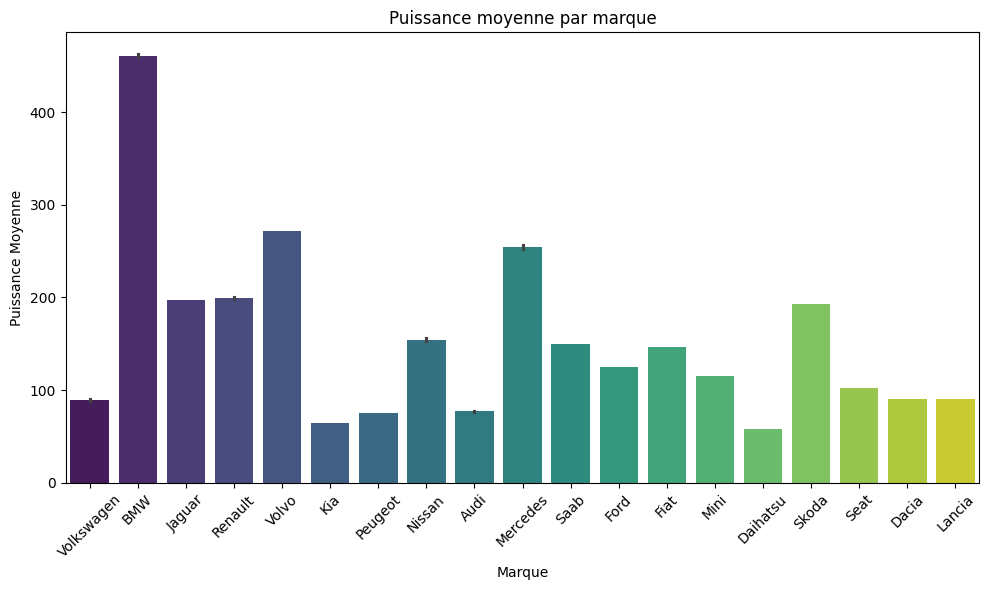

/tmp/ipykernel_3405/3061147739.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='nom', y='puissance', data=immatriculations_pd, palette="viridis")


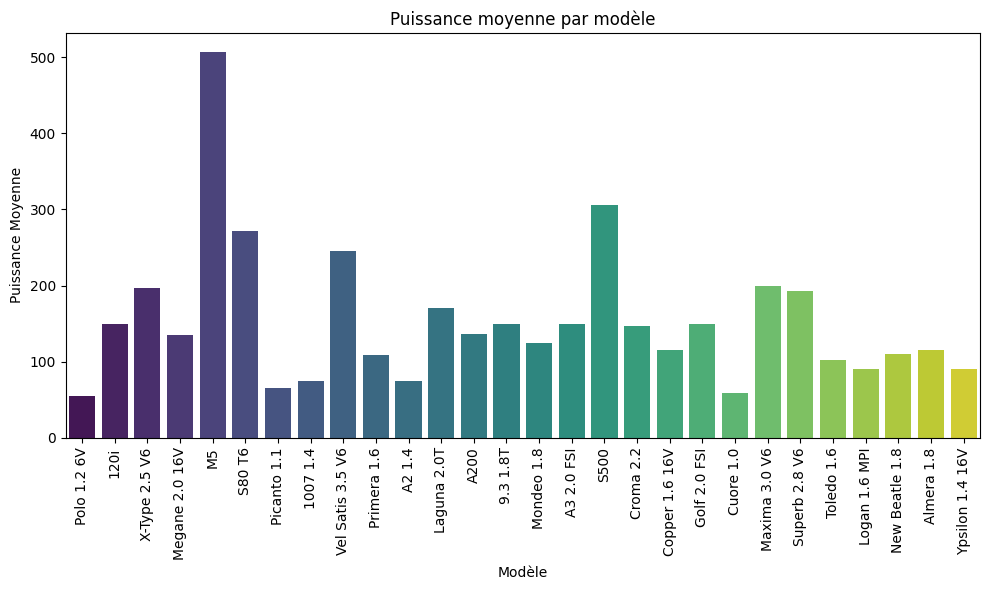

In [17]:
# Analyse des variables catégoriques
if 'marque' in immatriculations_pd.columns and 'puissance' in immatriculations_pd.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='marque', y='puissance', data=immatriculations_pd, palette="viridis")
    plt.title('Puissance moyenne par marque')
    plt.xlabel('Marque')
    plt.ylabel('Puissance Moyenne')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

if 'nom' in immatriculations_pd.columns and 'puissance' in immatriculations_pd.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='nom', y='puissance', data=immatriculations_pd, palette="viridis")
    plt.title('Puissance moyenne par modèle')
    plt.xlabel('Modèle')
    plt.ylabel('Puissance Moyenne')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

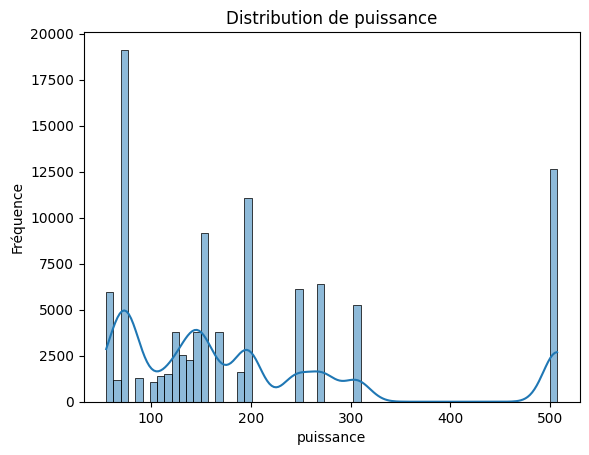

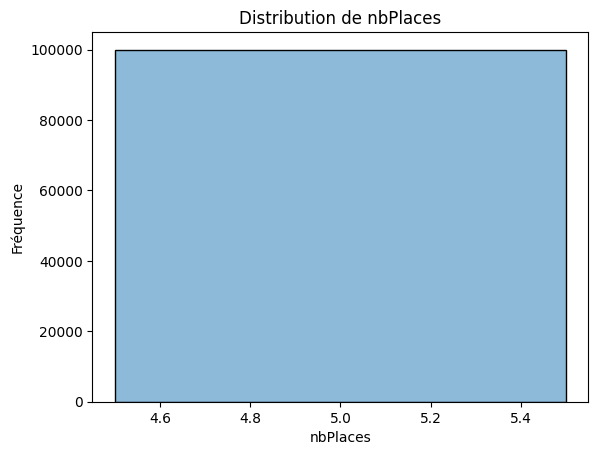

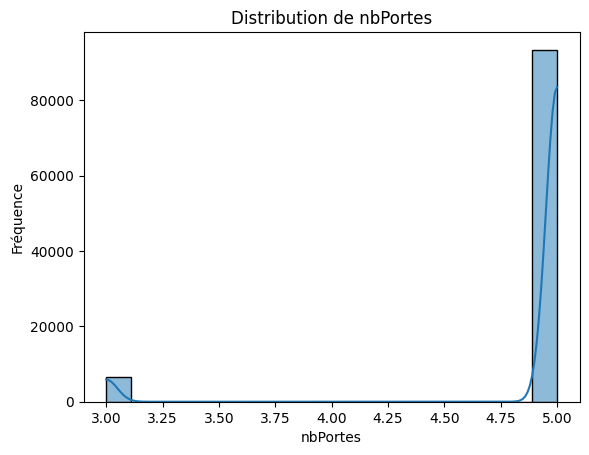

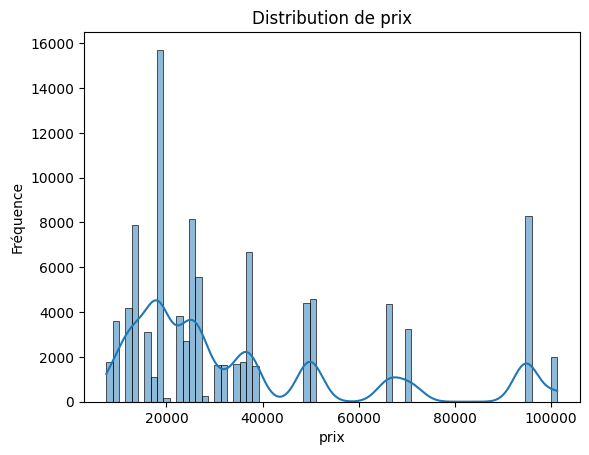

In [20]:
# Histogrammes pour les variables numériques
num_cols = [f.name for f in immatriculations.schema.fields if isinstance(f.dataType, (IntegerType, DoubleType))]
for col_name in num_cols:
    plt.figure()
    sns.histplot(immatriculations_pd[col_name], kde=True)
    plt.title(f'Distribution de {col_name}')
    plt.xlabel(col_name)
    plt.ylabel('Fréquence')
    plt.show()

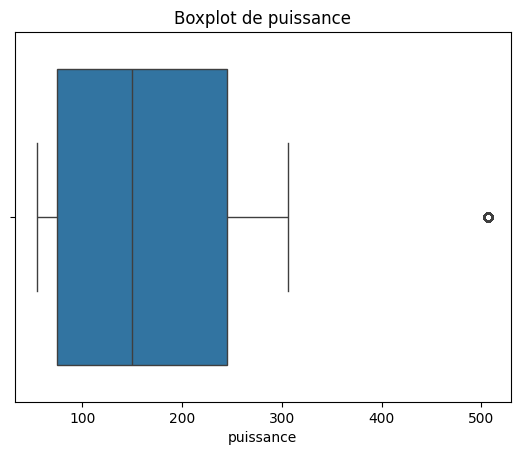

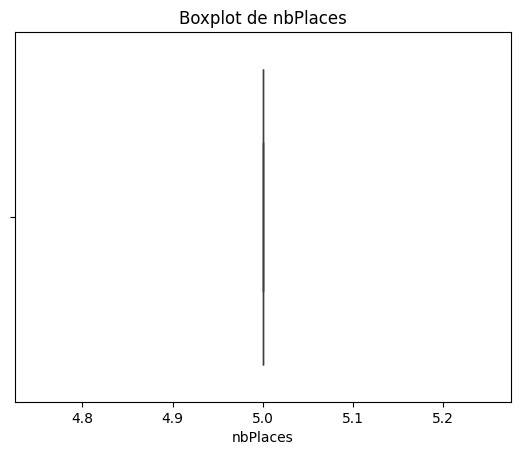

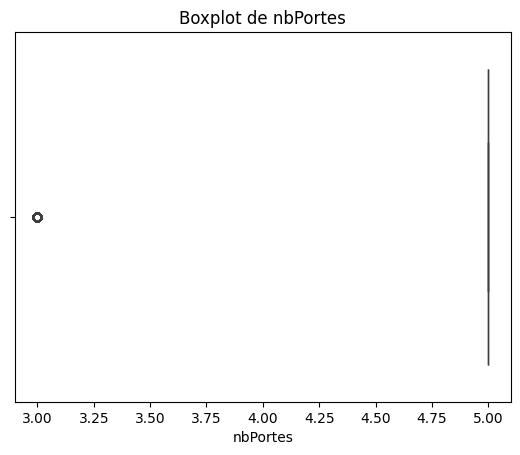

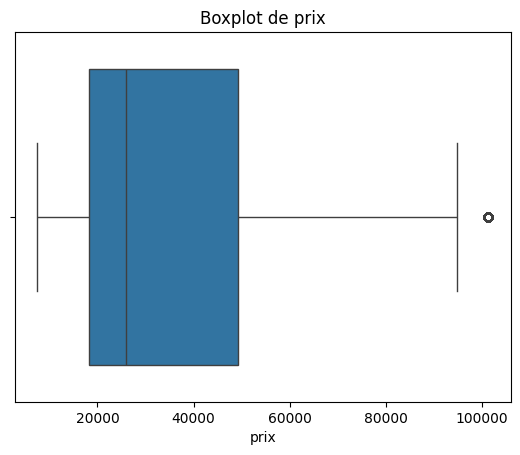

In [21]:
# Boxplots pour détecter les outliers
for col_name in num_cols:
    plt.figure()
    sns.boxplot(x=immatriculations_pd[col_name])
    plt.title(f'Boxplot de {col_name}')
    plt.show()

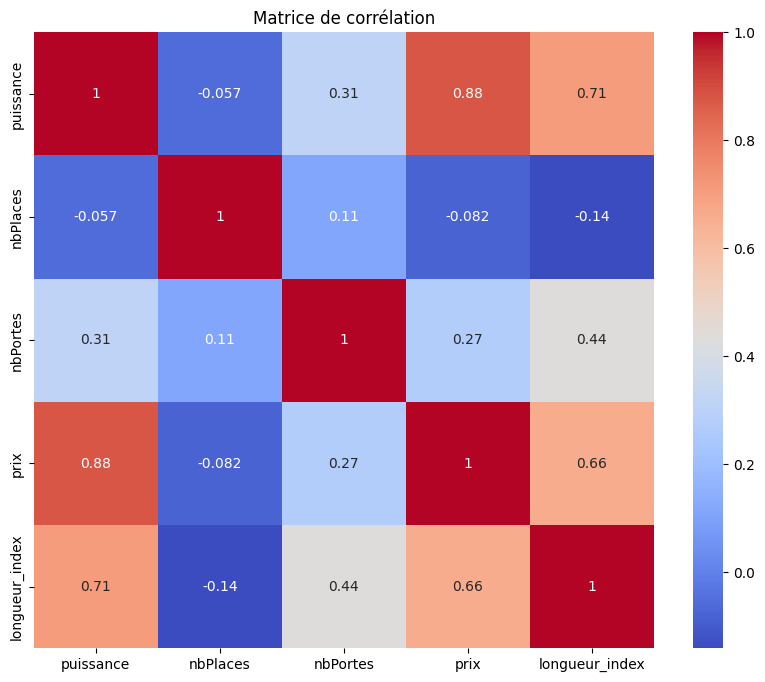

In [24]:
# Matrice de corrélation
num_cols = [f.name for f in catalogue.schema.fields if isinstance(f.dataType, (IntegerType, DoubleType))]
corr_matrix = catalogue.select(num_cols).toPandas().corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

In [25]:
# Sauvegarder les données nettoyées
immatriculations.write.csv("data/processed/immatriculations_processed.csv", header=True, mode="overwrite")
print("\nDonnées nettoyées sauvegardées dans 'immatriculations_processed.csv'")


Données nettoyées sauvegardées dans 'immatriculations_processed.csv'
